In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
from datetime import datetime
from scipy import stats
from LOTUS_regression.regression import mzm_regression
from LOTUS_regression.predictors import load_data
from LOTUS_regression.predictors.seasonal import add_seasonal_components
import LOTUS_regression.tests as tests

In [3]:
columnStr = ['year','month', 'Obsflux', 'Adjflux', 'Absflux']

#df = pd.read_csv('/Volumes/HD3/KMI/MLR_Uccle/Files/teleconnection_indices/solflux_monthly_average2018.txt',
#                   sep = "\s *", engine="python", skiprows=1, names=columnStr)
df = pd.read_csv('/home/poyraden/MLR_Uccle/Codes/Files/teleconnection_indices/solflux_monthly_average2018.txt',
                   sep = "\s *", engine="python", skiprows=1, names=columnStr)
df[0:10], len(df)

y = np.asarray(df.year.tolist())
m = np.asarray(df.month.tolist())
date = ['']*len(y)

for i in range(len(y)):
    date[i] = str(y[i])+ '-' + str(m[i]) + '-01'
date[300:320]

df['date'] =  pd.to_datetime(date, format='%Y-%m')

df.set_index('date', inplace=True)

df = df.drop(columns='year')
df = df.drop(columns='month')
df = df.loc['1977-02-01':'2017-06-01']

df[0:10]

,Obsflux,Adjflux,Absflux
date,,,
1977-02-01,82.29,80.31,72.28
1977-03-01,76.55,75.79,68.21
1977-04-01,77.62,78.17,70.36
1977-05-01,79.65,81.43,73.28
1977-06-01,91.54,94.44,85.00
1977-07-01,81.05,83.70,75.33
1977-08-01,84.26,86.34,77.71
1977-09-01,100.20,101.22,91.10
1977-10-01,96.92,96.30,86.66


In [4]:
year_dif = (pd.Timestamp('2017-06-01') - pd.Timestamp('1977-02-01'))/np.timedelta64(1,'Y')
year_dif

40.32937021294072

In [5]:
jan = [[0] * 40] *3;feb = [[0] * 40] *3;mar = [[0] * 40] *3;apr = [[0] * 40] *3;may = [[0] * 40] *3;jun = [[0] * 40] *3;
jul = [[0] * 40] *3;aug = [[0] * 40] *3;sep = [[0] * 40] *3;oct = [[0] * 40] *3;nov = [[0] * 40] *3;dec = [[0] * 40] *3

jan_mean = [0] * 3;feb_mean = [0] * 3;mar_mean = [0] * 3;apr_mean = [0] * 3;may_mean = [0] * 3;jun_mean = [0] * 3;
jul_mean = [0] * 3;aug_mean = [0] * 3;sep_mean = [0] * 3;oct_mean = [0] * 3;nov_mean = [0] * 3;dec_mean = [0] * 3

In [6]:
uct = {}

alt = ['Obsflux','Adjflux','Absflux']
alt2 = ['Obsflux_ds','Adjflux_ds','Absflux_ds']


for ir in range(3):  # per each km
    
    uct[ir] = df
    
    jan[ir].clear();
    feb[ir].clear();
    mar[ir].clear();
    apr[ir].clear();
    may[ir].clear();
    jun[ir].clear()
    jul[ir].clear();
    aug[ir].clear();
    sep[ir].clear();
    oct[ir].clear();
    nov[ir].clear();
    dec[ir].clear()

    for i in (uct[ir][alt[ir]].index):

        if (pd.Timestamp(i).month == 1):
            #print('hey',alt[ir],  i, (uct[ir][alt[ir]].loc[pd.Timestamp(i)]))
            jan[ir].append(uct[ir][alt[ir]].loc[pd.Timestamp(i)])
            jan[ir] = list(filter(lambda a: a != 0, jan[ir]))
        if (pd.Timestamp(i).month == 2):
            feb[ir].append(uct[ir][alt[ir]].loc[pd.Timestamp(i)])
            feb[ir] = list(filter(lambda a: a != 0, feb[ir]))
        if (pd.Timestamp(i).month == 3):
            mar[ir].append(uct[ir][alt[ir]].loc[pd.Timestamp(i)])
            mar[ir] = list(filter(lambda a: a != 0, mar[ir]))
        if (pd.Timestamp(i).month == 4):
            apr[ir].append(uct[ir][alt[ir]].loc[pd.Timestamp(i)])
            apr[ir] = list(filter(lambda a: a != 0, apr[ir]))
        if (pd.Timestamp(i).month == 5):
            may[ir].append(uct[ir][alt[ir]].loc[pd.Timestamp(i)])
            may[ir] = list(filter(lambda a: a != 0, may[ir]))
        if (pd.Timestamp(i).month == 6):
            jun[ir].append(uct[ir][alt[ir]].loc[pd.Timestamp(i)])
            jun[ir] = list(filter(lambda a: a != 0, jun[ir]))
        if (pd.Timestamp(i).month == 7):
            jul[ir].append(uct[ir][alt[ir]].loc[pd.Timestamp(i)])
            jul[ir] = list(filter(lambda a: a != 0, jul[ir]))
        if (pd.Timestamp(i).month == 8):
            aug[ir].append(uct[ir][alt[ir]].loc[pd.Timestamp(i)])
            aug[ir] = list(filter(lambda a: a != 0, aug[ir]))
        if (pd.Timestamp(i).month == 9):
            sep[ir].append(uct[ir][alt[ir]].loc[pd.Timestamp(i)])
            sep[ir] = list(filter(lambda a: a != 0, sep[ir]))
        if (pd.Timestamp(i).month == 10):
            oct[ir].append(uct[ir][alt[ir]].loc[pd.Timestamp(i)])
            oct[ir] = list(filter(lambda a: a != 0, oct[ir]))
        if (pd.Timestamp(i).month == 11):
            nov[ir].append(uct[ir][alt[ir]].loc[pd.Timestamp(i)])
            nov[ir] = list(filter(lambda a: a != 0, nov[ir]))
        if (pd.Timestamp(i).month == 12):
            dec[ir].append(uct[ir][alt[ir]].loc[pd.Timestamp(i)])
            dec[ir] = list(filter(lambda a: a != 0, dec[ir]))

        jan_mean[ir] = np.nanmean(jan[ir])
        feb_mean[ir] = np.nanmean(feb[ir])
        mar_mean[ir] = np.nanmean(mar[ir])
        apr_mean[ir] = np.nanmean(apr[ir])
        may_mean[ir] = np.nanmean(may[ir])
        jun_mean[ir] = np.nanmean(jun[ir])
        jul_mean[ir] = np.nanmean(jul[ir])
        aug_mean[ir] = np.nanmean(aug[ir])
        sep_mean[ir] = np.nanmean(sep[ir])
        oct_mean[ir] = np.nanmean(oct[ir])
        nov_mean[ir] = np.nanmean(nov[ir])
        dec_mean[ir] = np.nanmean(dec[ir])
print(jan_mean[0], dec_mean[0])
print(jan_mean[2], dec_mean[2])

/home/poyraden/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:64: RuntimeWarning: Mean of empty slice
/home/poyraden/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:66: RuntimeWarning: Mean of empty slice
/home/poyraden/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:67: RuntimeWarning: Mean of empty slice
/home/poyraden/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:68: RuntimeWarning: Mean of empty slice
/home/poyraden/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:69: RuntimeWarning: Mean of empty slice
/home/poyraden/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:70: RuntimeWarning: Mean of empty slice
/home/poyraden/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:71: RuntimeWarning: Mean of empty slice
/home/poyraden/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:72: RuntimeWarning: Mean of empty slice
/home/poyraden/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:73: R

129.74175 131.9855
113.048 115.084


In [7]:
print('january', len(jan[0]), np.mean(jan[0]), jan[0])
print('augustust', len(aug[0]), np.mean(aug[0]), aug[0])
print('next',jan_mean[0],aug_mean[0], dec_mean[0])

january 40 129.74175 [109.56999999999999, 202.99000000000001, 206.16, 174.56, 179.03999999999999, 142.28999999999999, 116.11, 74.459999999999994, 73.25, 72.510000000000005, 108.02, 235.38, 210.06, 229.36000000000001, 217.59, 121.01000000000001, 115.0, 82.609999999999999, 74.519999999999996, 73.590000000000003, 92.700000000000003, 141.74000000000001, 158.72, 167.5, 227.62, 143.72999999999999, 113.90000000000001, 102.86, 83.319999999999993, 83.760000000000005, 74.019999999999996, 69.700000000000003, 81.310000000000002, 83.390000000000001, 134.78999999999999, 126.83, 162.69, 142.0, 103.64, 77.370000000000005]
augustust 40 121.20625 [84.260000000000005, 114.05, 172.72, 166.22, 220.59, 167.87, 124.37, 83.670000000000002, 71.480000000000004, 68.370000000000005, 89.959999999999994, 154.21000000000001, 217.09, 222.65000000000001, 210.31, 122.06, 93.659999999999997, 76.120000000000005, 73.75, 72.480000000000004, 79.090000000000003, 139.86000000000001, 169.93000000000001, 163.56, 166.84999999999

In [8]:
uct2 = {}
dfde = pd.DataFrame()

for ir2 in range(3):  
    
    uct2[ir2] = df
   
    for i2 in (uct2[ir2][alt[ir2]].index):
        if (pd.Timestamp(i2).month == 1):
            uct2[ir2][alt[ir2]].loc[pd.Timestamp(i2)] = (uct2[ir2][alt[ir2]].loc[pd.Timestamp(i2)] - jan_mean[ir2])/jan_mean[ir2]
            print(i2, pd.Timestamp(i2),uct2[ir2][alt[ir2]].loc[pd.Timestamp(i2)]  )
        if (pd.Timestamp(i2).month == 2):
            uct2[ir2][alt[ir2]].loc[pd.Timestamp(i2)] = (uct2[ir2][alt[ir2]].loc[pd.Timestamp(i2)] - feb_mean[ir2])/feb_mean[ir2]
        if (pd.Timestamp(i2).month == 3):
            uct2[ir2][alt[ir2]].loc[pd.Timestamp(i2)] = (uct2[ir2][alt[ir2]].loc[pd.Timestamp(i2)] - mar_mean[ir2])/mar_mean[ir2]
        if (pd.Timestamp(i2).month == 4):
            uct2[ir2][alt[ir2]].loc[pd.Timestamp(i2)] = (uct2[ir2][alt[ir2]].loc[pd.Timestamp(i2)] - apr_mean[ir2])/apr_mean[ir2]
        if (pd.Timestamp(i2).month == 5):
            uct2[ir2][alt[ir2]].loc[pd.Timestamp(i2)] = (uct2[ir2][alt[ir2]].loc[pd.Timestamp(i2)] - may_mean[ir2])/may_mean[ir2]
        if (pd.Timestamp(i2).month == 6):
            uct2[ir2][alt[ir2]].loc[pd.Timestamp(i2)] = (uct2[ir2][alt[ir2]].loc[pd.Timestamp(i2)] - jun_mean[ir2])/jun_mean[ir2]
        if (pd.Timestamp(i2).month == 7):
            uct2[ir2][alt[ir2]].loc[pd.Timestamp(i2)] = (uct2[ir2][alt[ir2]].loc[pd.Timestamp(i2)] - jul_mean[ir2])/jul_mean[ir2]
        if (pd.Timestamp(i2).month == 8):
            uct2[ir2][alt[ir2]].loc[pd.Timestamp(i2)] = (uct2[ir2][alt[ir2]].loc[pd.Timestamp(i2)] - aug_mean[ir2])/aug_mean[ir2]
        if (pd.Timestamp(i2).month == 9):
            uct2[ir2][alt[ir2]].loc[pd.Timestamp(i2)] = (uct2[ir2][alt[ir2]].loc[pd.Timestamp(i2)] - sep_mean[ir2])/sep_mean[ir2]
        if (pd.Timestamp(i2).month == 10):
            uct2[ir2][alt[ir2]].loc[pd.Timestamp(i2)] = (uct2[ir2][alt[ir2]].loc[pd.Timestamp(i2)] - oct_mean[ir2])/oct_mean[ir2]
        if (pd.Timestamp(i2).month == 11):
            uct2[ir2][alt[ir2]].loc[pd.Timestamp(i2)] = (uct2[ir2][alt[ir2]].loc[pd.Timestamp(i2)] - nov_mean[ir2])/nov_mean[ir2]
        if (pd.Timestamp(i2).month == 12):
            uct2[ir2][alt[ir2]].loc[pd.Timestamp(i2)] = (uct2[ir2][alt[ir2]].loc[pd.Timestamp(i2)] - dec_mean[ir2])/dec_mean[ir2]


    #print('wh', ir2, alt[ir2],'uct',uct[ir2][alt[ir2]],'uct2',uct2[ir2][alt[ir2]])

    dfde[alt2[ir2]] = uct2[ir2][alt[ir2]]

dfde[20:40]

1978-01-01 00:00:00 1978-01-01 00:00:00 -0.155476167078
1979-01-01 00:00:00 1979-01-01 00:00:00 0.56456961618
1980-01-01 00:00:00 1980-01-01 00:00:00 0.589002768962
1981-01-01 00:00:00 1981-01-01 00:00:00 0.345442003056
1982-01-01 00:00:00 1982-01-01 00:00:00 0.379972136957
1983-01-01 00:00:00 1983-01-01 00:00:00 0.0967171323032
1984-01-01 00:00:00 1984-01-01 00:00:00 -0.105068337679
1985-01-01 00:00:00 1985-01-01 00:00:00 -0.426090676286
1986-01-01 00:00:00 1986-01-01 00:00:00 -0.435416895487
1987-01-01 00:00:00 1987-01-01 00:00:00 -0.441120533676
1988-01-01 00:00:00 1988-01-01 00:00:00 -0.167422976798
1989-01-01 00:00:00 1989-01-01 00:00:00 0.814219401234
1990-01-01 00:00:00 1990-01-01 00:00:00 0.619062483742
1991-01-01 00:00:00 1991-01-01 00:00:00 0.767819533805
1992-01-01 00:00:00 1992-01-01 00:00:00 0.677100856124
1993-01-01 00:00:00 1993-01-01 00:00:00 -0.0673010037247
1994-01-01 00:00:00 1994-01-01 00:00:00 -0.113623794962
1995-01-01 00:00:00 1995-01-01 00:00:00 -0.363273580016


,Obsflux_ds,Adjflux_ds,Absflux_ds
date,,,
1978-10-01,0.243099,0.243197,0.243226
1978-11-01,0.163610,0.163888,0.163862
1978-12-01,0.329616,0.329783,0.329811
1979-01-01,0.564570,0.564617,0.564557
1979-02-01,0.593600,0.593385,0.593364
1979-03-01,0.488093,0.488004,0.488049
1979-04-01,0.414787,0.416015,0.416054
1979-05-01,0.377899,0.377387,0.377774
1979-06-01,0.517203,0.516739,0.516777


In [9]:
dfde.loc['1980-01-01':'1981-01-01']

,Obsflux_ds,Adjflux_ds,Absflux_ds
date,,,
1980-01-01,0.589003,0.588740,0.588883
1980-02-01,0.561357,0.560744,0.560830
1980-03-01,0.346027,0.346606,0.346579
1980-04-01,0.692859,0.694928,0.694840
1980-05-01,0.868588,0.869503,0.870128
1980-06-01,0.625329,0.625707,0.625797
1980-07-01,0.540462,0.540380,0.540293
1980-08-01,0.371381,0.370868,0.370754
1980-09-01,0.485872,0.485862,0.485789


In [10]:
df.loc['1990-01-01':'1991-01-01']

,Obsflux,Adjflux,Absflux
date,,,
1990-01-01,0.619062,0.619390,0.619401
1990-02-01,0.392019,0.392742,0.392738
1990-03-01,0.512038,0.512595,0.512676
1990-04-01,0.508509,0.510470,0.510391
1990-05-01,0.582332,0.582653,0.583148
1990-06-01,0.438360,0.438276,0.438296
1990-07-01,0.506450,0.506395,0.506389
1990-08-01,0.836951,0.836278,0.836259
1990-09-01,0.433504,0.433564,0.433633


In [64]:
dfde[dfde['Obsflux_ds'] > 0]

,Obsflux_ds,Adjflux_ds,Absflux_ds
date,,,
1978-02-01,0.135475,0.135298,0.135311
1978-03-01,0.135410,0.134669,0.134732
1978-04-01,0.216269,0.217959,0.217936
1978-05-01,0.221843,0.221561,0.221817
1978-06-01,0.196530,0.196769,0.196692
1978-07-01,0.092804,0.092845,0.092816
1978-09-01,0.276076,0.276189,0.276186
1978-10-01,0.243099,0.243197,0.243226
1978-11-01,0.163610,0.163888,0.163862


['enso', 'trop', 'solar', 'qboA', 'qboB', 'aod', 'linear_pre', 'linear_post', 'pre_const', 'post_const', 'gap_cons']


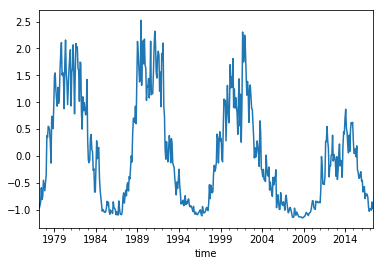

In [13]:
predictors = load_data('pred_baseline_ilt.csv')
print(list(predictors))
predictors.solar.plot()

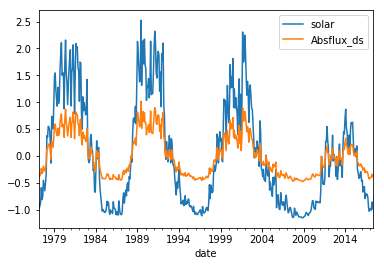

In [21]:
predictors.solar.plot(legend = 'pp')

dfde.Absflux_ds.plot(legend = 'deniz')
plt.savefig('Solar.pdf')

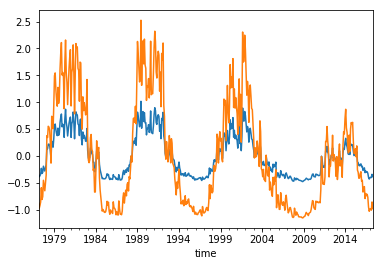

In [67]:
dfde.Obsflux_ds.plot()
predictors.solar.plot()

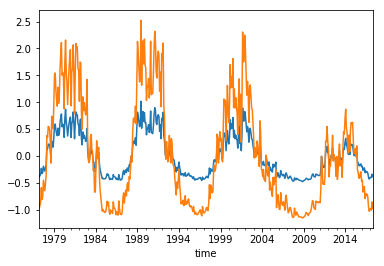

In [68]:
dfde.Adjflux_ds.plot()
predictors.solar.plot()

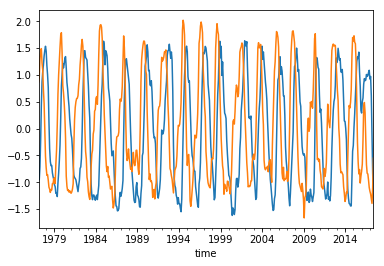

In [69]:
predictors.qboA.plot()
predictors.qboB.plot()
